# Chapter 1: The Building Blocks of a Song

## Learning Objectives

By the end of this chapter you will be able to:

1. Identify the standard **sections** of a song (verse, chorus, bridge, pre-chorus, intro, outro)
2. Recognize common **song forms** (AABA, verse-chorus, 12-bar blues)
3. Use Python to **parse, measure, and visualize** song structures
4. Compare section lengths across multiple songs

---

## Why Structure Matters

A song is not just a stream of sound. It is organized into **sections** that create contrast, repetition, and narrative arc. Understanding these building blocks is the first step to writing songs that hold a listener's attention.

Think of song structure like the floor plan of a house. Before you pick paint colors (melody) or furniture (lyrics), you need walls and rooms.

## Song Sections: A Reference

```
Section       Purpose                          Typical Length
─────────────────────────────────────────────────────────────
Intro         Set mood, grab attention          4-8 bars
Verse         Tell the story, new lyrics        8-16 bars
Pre-Chorus    Build tension toward chorus        4-8 bars
Chorus        Main hook, emotional peak          8-16 bars
Bridge        Contrast, new perspective          8 bars
Outro         Resolve, fade out                  4-8 bars
```

The **verse** advances the narrative. The **chorus** delivers the emotional payoff (and usually contains the song title). The **bridge** provides contrast so the final chorus feels fresh.

In [1]:
# Define song sections as simple data structures.
# Each section is a dict with a name, label (for charting), and typical bar count.

from dataclasses import dataclass

@dataclass
class Section:
    """One section of a song."""
    name: str       # e.g. "Verse 1"
    kind: str       # e.g. "verse", "chorus", "bridge"
    bars: int       # length in measures

# A simple verse-chorus song structure
pop_song = [
    Section("Intro",      "intro",      4),
    Section("Verse 1",    "verse",      8),
    Section("Chorus 1",   "chorus",     8),
    Section("Verse 2",    "verse",      8),
    Section("Chorus 2",   "chorus",     8),
    Section("Bridge",     "bridge",     8),
    Section("Chorus 3",   "chorus",     8),
    Section("Outro",      "outro",      4),
]

total_bars = sum(s.bars for s in pop_song)
print(f"Total bars: {total_bars}")
print(f"At 120 BPM in 4/4 time: {total_bars * 4 / 120 * 60:.0f} seconds ({total_bars * 4 / 120:.1f} minutes)")
print()
for s in pop_song:
    bar_visual = '█' * s.bars
    print(f"  {s.name:<12} [{s.kind:<8}] {bar_visual} ({s.bars} bars)")

Total bars: 56
At 120 BPM in 4/4 time: 112 seconds (1.9 minutes)

  Intro        [intro   ] ████ (4 bars)
  Verse 1      [verse   ] ████████ (8 bars)
  Chorus 1     [chorus  ] ████████ (8 bars)
  Verse 2      [verse   ] ████████ (8 bars)
  Chorus 2     [chorus  ] ████████ (8 bars)
  Bridge       [bridge  ] ████████ (8 bars)
  Chorus 3     [chorus  ] ████████ (8 bars)
  Outro        [outro   ] ████ (4 bars)


## Common Song Forms

Song forms are templates that describe the **order of sections**. We use letters to label unique musical ideas:

| Form | Pattern | Examples |
|------|---------|----------|
| **AABA** | Verse-Verse-Bridge-Verse | Classic Tin Pan Alley, jazz standards |
| **Verse-Chorus** | V-C-V-C-B-C | Most modern pop, rock |
| **AAA (Strophic)** | V-V-V-V | Folk songs, ballads |
| **12-Bar Blues** | I-I-I-I-IV-IV-I-I-V-IV-I-V | Blues, early rock |
| **ABAB** | V-C-V-C | Simple pop |

The letter changes when the **musical material** changes (different melody/chords), not just the lyrics.

In [2]:
# Define several song forms and visualize them as labeled timelines.

song_forms: dict[str, list[tuple[str, str, int]]] = {
    "AABA (32-bar)": [
        ("A", "verse", 8), ("A", "verse", 8),
        ("B", "bridge", 8), ("A", "verse", 8),
    ],
    "Verse-Chorus": [
        ("Intro", "intro", 4),
        ("V1", "verse", 8), ("C1", "chorus", 8),
        ("V2", "verse", 8), ("C2", "chorus", 8),
        ("Br", "bridge", 8), ("C3", "chorus", 8),
        ("Out", "outro", 4),
    ],
    "Strophic (AAA)": [
        ("V1", "verse", 8), ("V2", "verse", 8),
        ("V3", "verse", 8), ("V4", "verse", 8),
    ],
    "ABABCB": [
        ("V1", "verse", 8), ("C1", "chorus", 8),
        ("V2", "verse", 8), ("C2", "chorus", 8),
        ("Br", "bridge", 8), ("C3", "chorus", 8),
    ],
}

# Print ASCII timeline for each form
for form_name, sections in song_forms.items():
    total = sum(b for _, _, b in sections)
    labels = " ".join(f"[{name}:{bars}]" for name, _, bars in sections)
    print(f"{form_name} ({total} bars)")
    print(f"  {labels}")
    print()

AABA (32-bar) (32 bars)
  [A:8] [A:8] [B:8] [A:8]

Verse-Chorus (56 bars)
  [Intro:4] [V1:8] [C1:8] [V2:8] [C2:8] [Br:8] [C3:8] [Out:4]

Strophic (AAA) (32 bars)
  [V1:8] [V2:8] [V3:8] [V4:8]

ABABCB (48 bars)
  [V1:8] [C1:8] [V2:8] [C2:8] [Br:8] [C3:8]



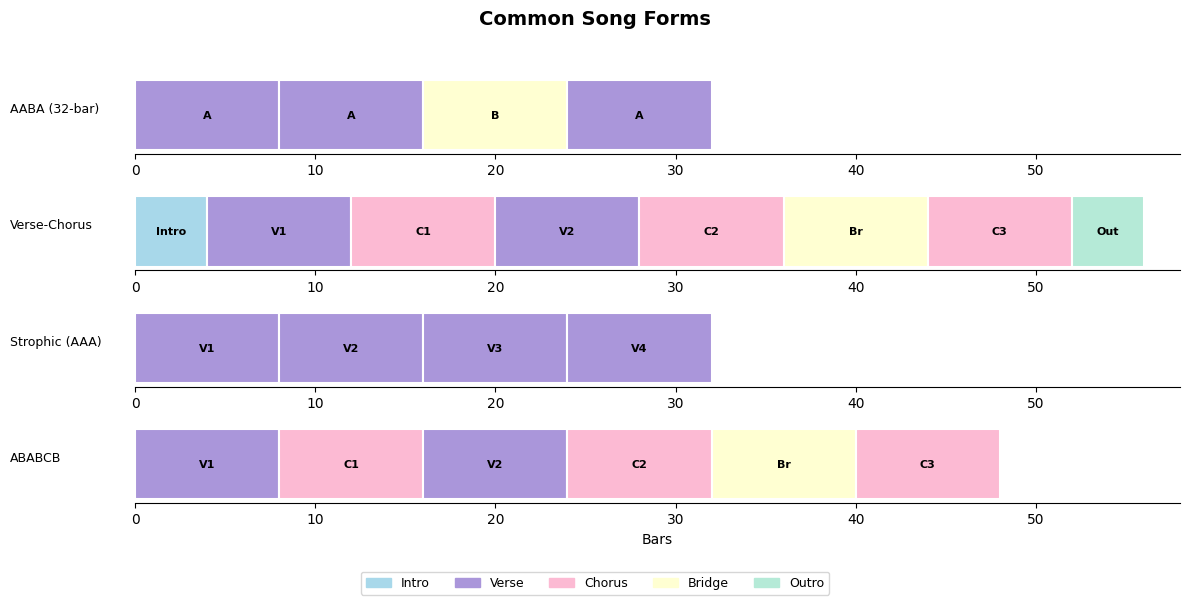

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Color map for section types
SECTION_COLORS: dict[str, str] = {
    "intro":   "#A8D8EA",
    "verse":   "#AA96DA",
    "chorus":  "#FCBAD3",
    "bridge":  "#FFFFD2",
    "outro":   "#B5EAD7",
}

fig, axes = plt.subplots(len(song_forms), 1, figsize=(12, 6), sharex=False)
fig.suptitle("Common Song Forms", fontsize=14, fontweight="bold")

for ax, (form_name, sections) in zip(axes, song_forms.items()):
    x = 0  # running bar position
    for label, kind, bars in sections:
        color = SECTION_COLORS.get(kind, "#CCCCCC")
        ax.barh(0, bars, left=x, height=0.6, color=color, edgecolor="white", linewidth=1.5)
        ax.text(x + bars / 2, 0, label, ha="center", va="center", fontsize=8, fontweight="bold")
        x += bars
    ax.set_xlim(0, max(sum(b for _, _, b in s) for s in song_forms.values()) + 2)
    ax.set_yticks([])
    ax.set_ylabel(form_name, fontsize=9, rotation=0, labelpad=90, ha="left")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

axes[-1].set_xlabel("Bars")

# Legend
legend_patches = [mpatches.Patch(color=c, label=k.title()) for k, c in SECTION_COLORS.items()]
fig.legend(handles=legend_patches, loc="lower center", ncol=5, fontsize=9)
plt.tight_layout(rect=[0, 0.06, 1, 0.95])
plt.show()

## Analyzing Section Lengths

How long are sections in practice? Let's create a small dataset of song structures and compare them.

In [7]:
# A dataset of hypothetical song structures (section kind -> bars)
# Each entry represents a song's section breakdown.

songs_data: dict[str, list[tuple[str, int]]] = {
    "Pop Ballad":      [("intro", 4), ("verse", 16), ("chorus", 8), ("verse", 16), ("chorus", 8), ("bridge", 8), ("chorus", 8), ("outro", 4)],
    "Rock Anthem":     [("intro", 8), ("verse", 8), ("chorus", 12), ("verse", 8), ("chorus", 12), ("bridge", 8), ("chorus", 12), ("outro", 8)],
    "Folk Song":       [("verse", 8), ("verse", 8), ("verse", 8), ("verse", 8)],
    "EDM Track":       [("intro", 16), ("verse", 8), ("chorus", 16), ("verse", 8), ("chorus", 16), ("outro", 16)],
    "Jazz Standard":   [("verse", 8), ("verse", 8), ("bridge", 8), ("verse", 8)],
}

# Compute total bars per section type for each song
from collections import defaultdict

section_totals: dict[str, dict[str, int]] = {}
for song_name, sections in songs_data.items():
    totals: dict[str, int] = defaultdict(int)
    for kind, bars in sections:
        totals[kind] += bars
    section_totals[song_name] = dict(totals)

# Print summary table
all_kinds = ["intro", "verse", "chorus", "bridge", "outro"]
header = f"{'Song':<16}" + "".join(f"{k:<10}" for k in all_kinds) + "Total"
print(header)
print("─" * len(header))
for song_name, totals in section_totals.items():
    row = f"{song_name:<16}"
    for k in all_kinds:
        row += f"{totals.get(k, 0):<10}"
    row += str(sum(totals.values()))
    print(row)

Song            intro     verse     chorus    bridge    outro     Total
───────────────────────────────────────────────────────────────────────
Pop Ballad      4         32        24        8         4         72
Rock Anthem     8         16        36        8         8         76
Folk Song       0         32        0         0         0         32
EDM Track       16        16        32        0         16        80
Jazz Standard   0         24        0         8         0         32


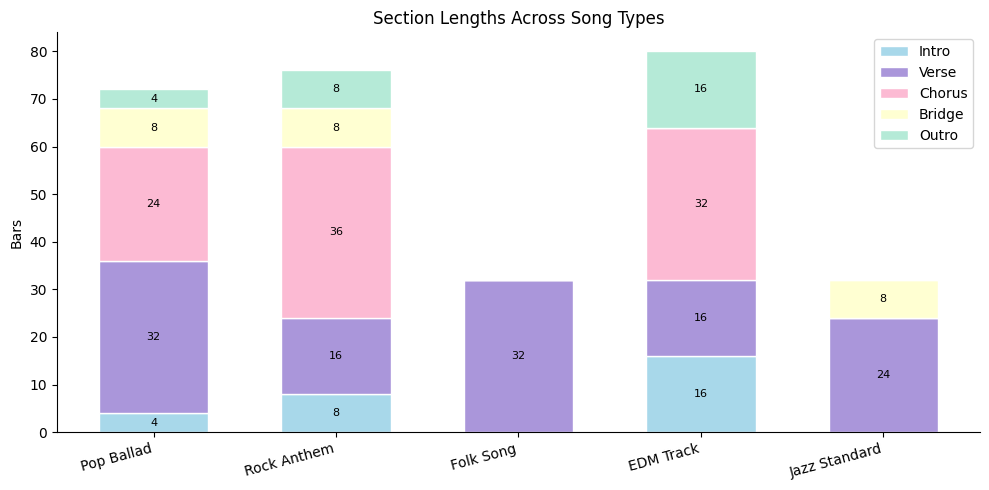

In [8]:
# Stacked bar chart: section lengths across songs

fig, ax = plt.subplots(figsize=(10, 5))

song_names = list(section_totals.keys())
x = np.arange(len(song_names))
bar_width = 0.6

bottom = np.zeros(len(song_names))
for kind in all_kinds:
    values = [section_totals[s].get(kind, 0) for s in song_names]
    color = SECTION_COLORS.get(kind, "#CCCCCC")
    ax.bar(x, values, bar_width, bottom=bottom, label=kind.title(), color=color, edgecolor="white")
    # Add bar labels for nonzero values
    for i, v in enumerate(values):
        if v > 0:
            ax.text(i, bottom[i] + v / 2, str(v), ha="center", va="center", fontsize=8)
    bottom += np.array(values)

ax.set_xticks(x)
ax.set_xticklabels(song_names, rotation=15, ha="right")
ax.set_ylabel("Bars")
ax.set_title("Section Lengths Across Song Types")
ax.legend(loc="upper right")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()

## Key Observations

From the chart above, notice:

1. **Choruses dominate** in pop and rock -- they get the most total bars because they repeat.
2. **Folk and jazz** skip the chorus entirely. The verse carries everything.
3. **EDM** uses long intros and outros for DJ mixing -- the structure serves a different function.
4. **Bridges are short** everywhere. They are contrast, not the main event.

These are not rules to follow blindly. They are **patterns to know** so you can use them intentionally -- or break them on purpose.

In [6]:
# A small utility: convert a form string like "AABA" into a section list.
# This will be useful throughout the course.

def parse_form(form_string: str, bars_per_section: int = 8) -> list[Section]:
    """Convert a letter-based form string into a list of Sections.
    
    Args:
        form_string: e.g. "AABA" or "ABABCB"
        bars_per_section: bars per letter (default 8)
    
    Returns:
        List of Section objects
    """
    # Map letters to section kinds
    letter_kinds = {"A": "verse", "B": "chorus", "C": "bridge"}
    sections = []
    counts: dict[str, int] = defaultdict(int)  # track how many times each letter appears
    for letter in form_string:
        counts[letter] += 1
        kind = letter_kinds.get(letter, "other")
        name = f"{kind.title()} {counts[letter]}"
        sections.append(Section(name, kind, bars_per_section))
    return sections

# Example: ABABCB form
form = parse_form("ABABCB")
for s in form:
    print(f"  {s.name:<12} [{s.kind}] {'█' * s.bars}")
print(f"\nTotal: {sum(s.bars for s in form)} bars")

  Verse 1      [verse] ████████
  Chorus 1     [chorus] ████████
  Verse 2      [verse] ████████
  Chorus 2     [chorus] ████████
  Bridge 1     [bridge] ████████
  Chorus 3     [chorus] ████████

Total: 48 bars


## Exercises

1. **Map a song you know**: Pick a song you like and create a `Section` list for it. How many total bars? What percentage is chorus?
2. **Compare forms**: Create two different forms (e.g., AABA vs. ABAB) using `parse_form()` and compare their total lengths.
3. **Invent a form**: Design a song form you have never seen. What sections would it have? Why?

---

## What's Next

Now that you understand the **containers** a song is built from, it is time to fill them. In **Chapter 2: Melody**, we will explore the notes that make a song singable -- intervals, scales, and the shape of a melodic line.